# digit recognizer

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn

In [5]:
import importer

In [8]:
import k_means

importing Jupyter notebook from k_means.ipynb


In [9]:
d=pd.read_csv("/Users/sunchenxi/Desktop/lab/kaggle/digit/train.csv")

In [10]:
#x为像素值，y为标签
X=d.values[:,1:]
Y=d.values[:,0]

### PCA

In [11]:
#pca
pca=PCA()
Xpca=pca.fit_transform(X)

In [12]:
Xpca

array([[ -6.61595780e+02,  -6.99311328e+02,   1.83282040e+02, ...,
         -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00],
       [  1.70145168e+03,  -3.60551556e+02,  -5.01805594e+02, ...,
         -2.91391576e-14,   8.20368599e-14,   4.17616589e-14],
       [ -8.86894434e+02,  -2.93765782e+02,   6.71553099e+01, ...,
          1.08707804e-15,   1.30569224e-13,  -8.29447343e-14],
       ..., 
       [  3.36269982e+02,   9.50015280e+02,  -1.68605414e+02, ...,
          1.74184299e-15,   9.02634101e-16,   6.39987151e-16],
       [  3.27399392e+02,   6.20160894e+01,   6.97536401e+02, ...,
          2.60502940e-15,  -1.66619753e-15,  -1.06275851e-15],
       [ -3.64249200e+02,   4.18893026e+02,   6.28998232e+01, ...,
         -2.97832290e-16,   1.60114178e-15,  -1.26351444e-15]])

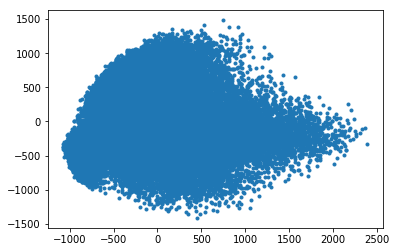

In [13]:
plt.plot(Xpca[:,0],Xpca[:,1],'.')

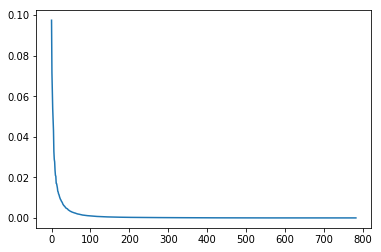

In [14]:
#查看每个主成分能表达原始数据的方差
plt.plot(pca.explained_variance_ratio_)

In [15]:
#选择主要的成分获取
np.where(pca.explained_variance_ratio_>0.005)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),)

In [16]:
Xpca_r = Xpca[:,:36]

In [17]:
Xpca_r

array([[ -661.59577975,  -699.31132821,   183.28203965, ...,
          -53.22922851,    -6.88959872,  -146.88658286],
       [ 1701.4516848 ,  -360.5515562 ,  -501.80559391, ...,
           57.92169546,   -10.44478592,   -91.73639687],
       [ -886.89443411,  -293.76578219,    67.15530988, ...,
         -118.05180441,   -16.87438646,    -1.79646525],
       ..., 
       [  336.26998171,   950.01528029,  -168.60541437, ...,
          -87.24380317,    38.53574201,    13.7001805 ],
       [  327.39939154,    62.01608944,   697.53640055, ...,
           46.93582702,    33.21405869,    73.09949535],
       [ -364.24919987,   418.89302645,    62.89982318, ...,
          230.74209608,  -130.11717   ,   141.23175973]])

In [27]:
#centroidList = k_means.initCentroids(Xpca, 10)           # 初始化质心 
#clusterDict = k_means.minDistance(Xpca, centroidList)   # 第一次聚类迭代  
#newVar = k_means.getVar(clusterDict, centroidList)  # 获得均方误差值，通过新旧均方误差来获得迭代终止条件
#oldVar = -0.0001 
#centroidList = k_means.getCentroids(clusterDict)

In [28]:
#centroidList

[[-179.1739921065593,
  632.971589856886,
  119.03532601964129,
  -404.5014591696541,
  -88.29793073778272,
  333.3687299077559,
  345.20590309944185,
  106.10590169481105,
  -85.87960895036409,
  -213.3334749533687,
  32.24555301123219,
  -103.69499734206302,
  27.072518613393225,
  36.16227098681153,
  8.859943800091244,
  26.51488800976709,
  79.31488809914836,
  13.6518562385051,
  28.853513488009934,
  -6.764938481908889,
  -3.390298057872035,
  50.25325488445914,
  -11.140586271071516,
  -6.437534909966156,
  -22.011769042333718,
  -2.69492512880731,
  1.3706095898709325,
  -58.48959579356022,
  11.970052115527544,
  -41.867026869260584,
  -38.103554670888805,
  -20.93722294300586,
  3.612956846962376,
  1.811032737954228,
  28.040492484690475,
  -6.763179257132921,
  -12.155757329639052,
  -14.238878881129608,
  -5.922751466842014,
  -8.640483648013902,
  -25.506364394299297,
  3.9113519998895936,
  -1.2963812913064703,
  7.186990037513801,
  7.343274409325892,
  23.373734866298

In [29]:
newVar

87256006.262005955

In [34]:
for i in range(0,10):
    clusterDict = k_means.minDistance(Xpca, centroidList)  
    newVar = k_means.getVar(clusterDict, centroidList)  # 获得均方误差值，通过新旧均方误差来获得迭代终止条件
    centroidList = k_means.getCentroids(clusterDict)

In [35]:
newVar

66201360.835775182

### Nearest Neighbor

In [18]:
from sklearn import model_selection
from tqdm import tqdm  #用来看进度

In [20]:
#用train里面的数据来测试
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xpca_r, Y, test_size=0.33)

In [21]:
#nn算法
def find_nearest_neighbor(x, D):
    xr=x.reshape((1,len(x))).repeat(len(D), axis=0)
    delt=D-xr
    sq_dist=np.sum(delt*delt, axis=1)
    return np.argmin(sq_dist)

### 测试

In [22]:
#一个测试的数图
X_test[0]

array([ -94.37547105, -188.05899309,  -35.32851807, -745.33524934,
        968.36475572,   41.34476633,  466.76045325, -230.32428614,
         82.20405171,  439.6925009 ,  -53.13459916, -145.70146216,
        405.37120081, -512.63243517,  -16.68247439,  -85.67613366,
       -292.59362844,  -16.75538946, -226.22866386,   20.48544603,
        161.45664375, -126.85624268, -278.34703942, -195.30554787,
         53.10142581,  -12.80513829,  -93.31307527, -170.88429355,
        -85.7384244 ,  205.20441346,  297.73623294,   43.33592412,
        119.62870915, -110.71609717,   85.66884825,  -71.32222192,
        -70.29107168,  -70.22918913,   97.68784669,   18.3390107 ])

In [23]:
#和X_test[0]最邻近的图的标签
idx= find_nearest_neighbor(X_test[0],X_train)
y_train[idx]

8

In [24]:
#X_test[0]图的标签
y_test[0]

8

### 准确度

In [25]:
#获取一系列的预测
def predict_Labels(X, D, labels):
    r=[]
    for x in tqdm(X):
        idx = find_nearest_neighbor(x, D)
        predicted_label = labels[idx]
        r.append(predicted_label)
    return r

In [26]:
y_pred_ = predict_Labels(X_test, X_train, y_train)
y_pred = np.array(y_pred_)

100%|██████████| 13860/13860 [03:00<00:00, 76.81it/s]


In [27]:
#预测对的个数
num_corrects = sum(y_pred==y_test)
#对的个数，总个数，
num_corrects, len(y_test)

(13459, 13860)

In [28]:
#准确度
float(13439)/float(13860)

0.9696248196248196

### 误差分析

In [56]:
#预测不正确的坐标
incorrects_idx = np.where(y_pred!=y_test)

In [57]:
X_test_error = X_test[incorrects_idx]
y_test_error = y_test[incorrects_idx]
y_pred_error = y_pred[incorrects_idx]

In [58]:
y_pred_error

array([9, 9, 6, 8, 9, 5, 1, 7, 9, 5, 9, 7, 6, 8, 5, 9, 9, 7, 9, 9, 8, 1, 3,
       2, 2, 2, 6, 9, 7, 6, 1, 8, 8, 8, 9, 9, 9, 8, 4, 4, 3, 2, 2, 6, 9, 8,
       6, 9, 9, 1, 3, 1, 4, 9, 5, 7, 2, 2, 3, 6, 3, 8, 2, 4, 2, 3, 2, 4, 6,
       9, 9, 2, 9, 5, 9, 7, 6, 0, 4, 7, 1, 8, 9, 3, 3, 2, 8, 6, 5, 7, 2, 8,
       3, 2, 6, 8, 1, 3, 2, 4, 7, 9, 7, 9, 5, 8, 9, 6, 7, 8, 4, 9, 6, 5, 7,
       5, 6, 6, 4, 8, 5, 0, 6, 1, 4, 2, 9, 8, 9, 3, 3, 7, 5, 9, 8, 9, 8, 0,
       9, 7, 6, 9, 3, 3, 1, 9, 9, 3, 5, 6, 6, 3, 3, 7, 8, 5, 9, 9, 4, 9, 2,
       5, 9, 6, 6, 1, 9, 4, 3, 1, 3, 2, 1, 3, 4, 0, 4, 9, 5, 0, 9, 9, 5, 5,
       8, 5, 9, 1, 6, 1, 7, 9, 9, 1, 3, 7, 1, 3, 7, 6, 5, 5, 5, 7, 7, 4, 0,
       9, 9, 7, 9, 5, 6, 3, 5, 3, 5, 6, 8, 5, 1, 0, 3, 3, 0, 4, 9, 7, 9, 9,
       1, 3, 1, 7, 3, 5, 7, 7, 5, 0, 8, 7, 9, 7, 7, 9, 5, 7, 8, 7, 3, 2, 6,
       3, 4, 1, 5, 5, 3, 4, 9, 4, 8, 6, 1, 8, 5, 7, 5, 6, 9, 6, 0, 5, 3, 8,
       3, 6, 9, 9, 9, 3, 4, 9, 2, 3, 2, 8, 4, 9, 9, 3, 5, 9, 9, 5, 8, 7, 9,
       4, 5,

In [59]:
y_test_error

array([4, 4, 8, 3, 4, 6, 8, 9, 4, 8, 5, 2, 0, 5, 3, 4, 7, 3, 7, 4, 3, 0, 8,
       3, 3, 3, 9, 4, 9, 1, 8, 3, 3, 3, 5, 4, 4, 2, 8, 9, 8, 7, 1, 8, 8, 3,
       2, 4, 4, 7, 8, 2, 9, 4, 9, 2, 3, 1, 5, 5, 5, 6, 0, 9, 3, 9, 3, 8, 8,
       4, 4, 7, 4, 1, 4, 9, 2, 5, 9, 9, 2, 3, 7, 5, 5, 7, 5, 0, 3, 2, 9, 3,
       8, 6, 5, 5, 7, 1, 3, 9, 8, 8, 9, 5, 3, 5, 4, 9, 0, 3, 9, 4, 5, 3, 4,
       6, 8, 5, 9, 5, 8, 9, 0, 2, 9, 7, 3, 9, 4, 9, 8, 9, 3, 4, 3, 7, 3, 2,
       7, 4, 0, 4, 5, 2, 7, 0, 8, 5, 6, 8, 5, 9, 8, 2, 5, 2, 5, 3, 9, 4, 3,
       8, 8, 4, 8, 4, 0, 9, 9, 5, 5, 3, 7, 9, 9, 2, 9, 8, 3, 6, 4, 4, 3, 3,
       3, 9, 4, 7, 5, 8, 8, 5, 3, 2, 5, 8, 8, 2, 9, 0, 3, 9, 3, 2, 3, 9, 5,
       4, 5, 2, 8, 6, 5, 5, 8, 9, 3, 3, 3, 8, 3, 5, 9, 5, 4, 9, 4, 2, 4, 4,
       7, 5, 4, 8, 8, 3, 1, 1, 8, 8, 3, 2, 4, 2, 3, 4, 6, 4, 5, 2, 5, 7, 4,
       8, 8, 7, 8, 8, 5, 9, 7, 9, 3, 8, 7, 3, 8, 1, 6, 2, 4, 0, 9, 6, 5, 7,
       5, 4, 4, 4, 3, 1, 9, 4, 8, 2, 7, 4, 9, 3, 7, 1, 0, 4, 7, 3, 3, 9, 3,
       9, 6,

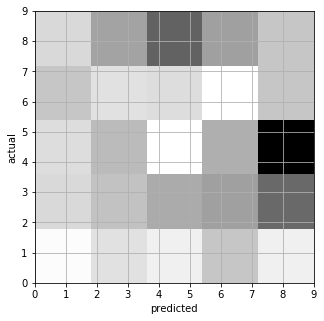

In [61]:
#预测差错图，发现8，9总是被预测错或被错预测成
plt.figure(figsize=(5,5))
plt.hist2d(y_pred_error,y_test_error,bins=5,cmap=plt.cm.gray_r);
plt.grid('on');
plt.xlabel("predicted");
plt.ylabel("actual");

### 以上，使用pca后进行Nearest Neighbor预测，准确度为0.9696248196248196，数字8，9易出错